In [7]:
import os
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# dataseti yükle
tips_dataset='tips.csv'
tips_raw = pd.read_csv(tips_dataset)

In [9]:
# verilerin kopyası
tips=tips_raw.copy()

In [10]:
# verileri aç
tips
# ilk 5 satır
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
# satır ve sütun sayısı
tips.shape

(244, 7)

In [12]:
# sütün isimleri
tips.columns


Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [13]:
# dataset bilgileri
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [14]:
# değişkenlerdeki değerleri göster
for col in tips.columns[2:6]:
    print(col, np.unique(tips[col]))

sex ['Female' 'Male']
smoker ['No' 'Yes']
day ['Fri' 'Sat' 'Sun' 'Thur']
time ['Dinner' 'Lunch']


In [15]:
# eksik değerler
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [16]:
# istatistikler
tips.describe()
tips.describe().T 

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [17]:
# korelasyon matrisi
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Male      157
Female     87
Name: sex, dtype: int64


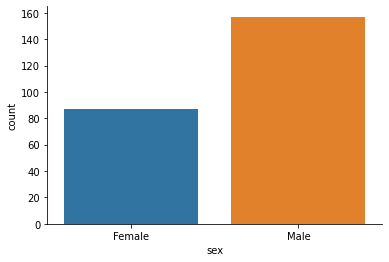

In [18]:
# Mutlak değerler kayıt sayısı
sns.countplot(x='sex', data=tips)
sns.despine()
print(tips.sex.value_counts())

<AxesSubplot:xlabel='count', ylabel='smoker'>

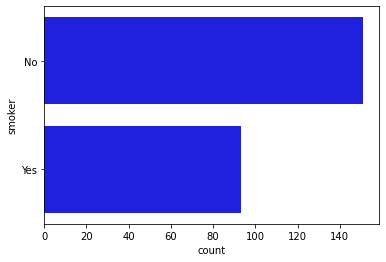

In [19]:
# yatay, her ikisi aynı renk
sns.countplot(y='smoker', data=tips, color='b') 

<AxesSubplot:xlabel='sex', ylabel='count'>

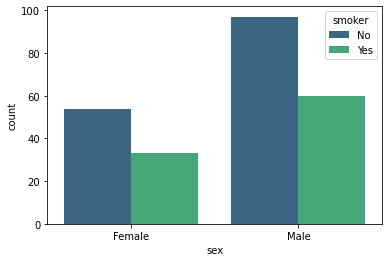

In [20]:
#cinsiyetler ve sigara içme oranları
sns.countplot(x='sex', data=tips, hue='smoker', palette='viridis')

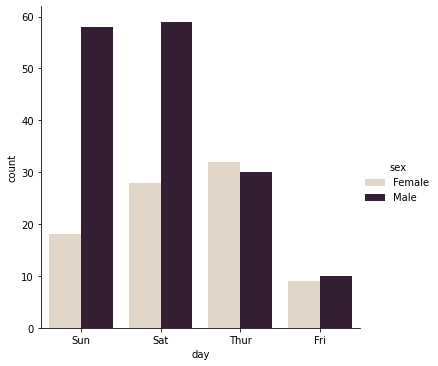

In [21]:
#
sns.catplot(x='day', data=tips, hue='sex', palette='ch:.25', kind='count')

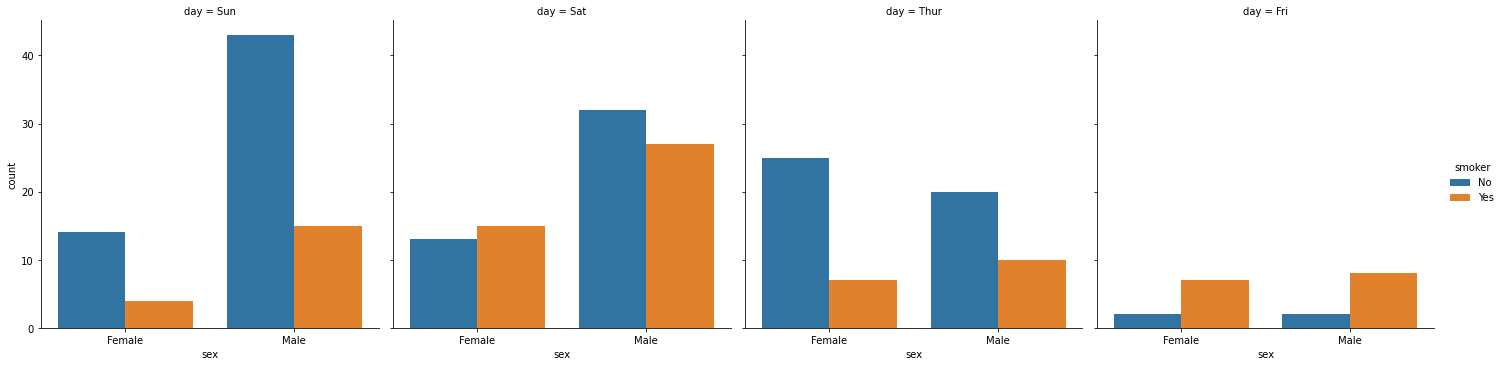

In [22]:
sns.catplot(x='sex', hue='smoker', col='day', data=tips, kind='count')

Male      64.344262
Female    35.655738
Name: sex, dtype: float64


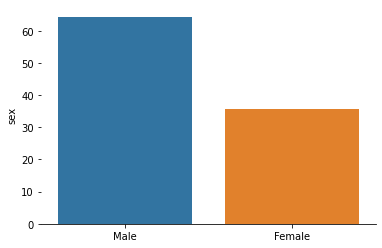

In [23]:
perc=tips['sex'].value_counts(normalize=True)*100
print(perc)
sns.barplot(x=perc.index, y=perc, data=tips)
sns.despine(left='True')

Text(0.5, 1.0, 'PDF of Tip')

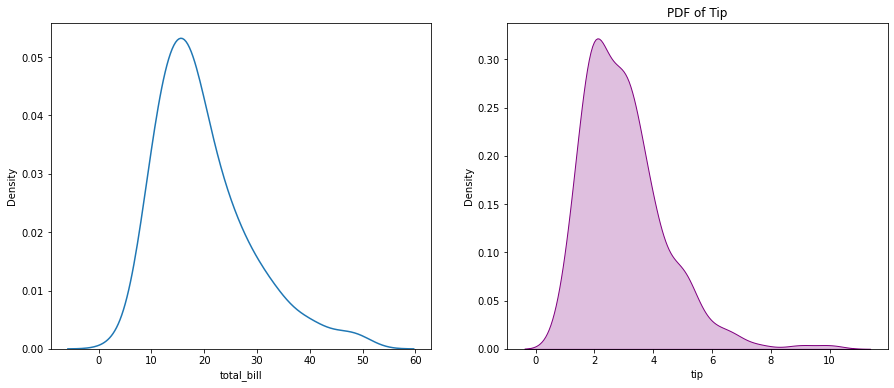

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15,6)) # plot 2 graphs

# simple density function
sns.kdeplot(tips.total_bill, ax=axes[0])

# filled area under the curve, set color, remove legend, set title
sns.kdeplot(tips.tip, shade=True, color='purple', legend=False, ax=axes[1]).set_title('PDF of Tip') 

In [27]:
tips[tips.total_bill>=40]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
95,40.17,4.73,Male,Yes,Fri,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [28]:
tips[tips.tip>=6]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3


[Text(0.5, 0, 'X axis- Size'),
 Text(0, 0.5, 'Y axis - Tip'),
 Text(0.5, 1.0, 'Line plot - Size vs. Tip')]

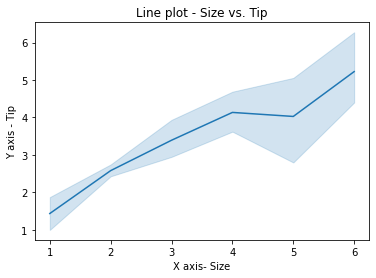

In [30]:
# line plot with confidence interval, set axes and title
sns.lineplot(x='size', y='tip', data=tips).set(xlabel='X axis- Size', ylabel='Y axis - Tip', title='Line plot - Size vs. Tip')

<AxesSubplot:xlabel='size', ylabel='tip'>

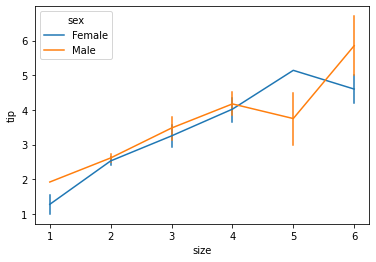

In [31]:
# show error bars and plot the standard error 
sns.lineplot(x='size', y='tip', hue='sex', data=tips, err_style='bars', ci=68)

In [35]:
sns.set(style='whitegrid') # set background for following graphs

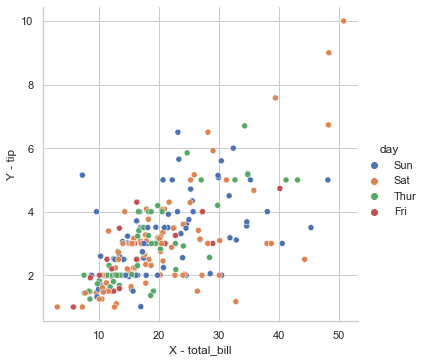

In [36]:
# draw a single facet, set axes 
sns.relplot(x='total_bill', y='tip', hue='day', data = tips).set(xlabel='X - total_bill', ylabel='Y - tip')

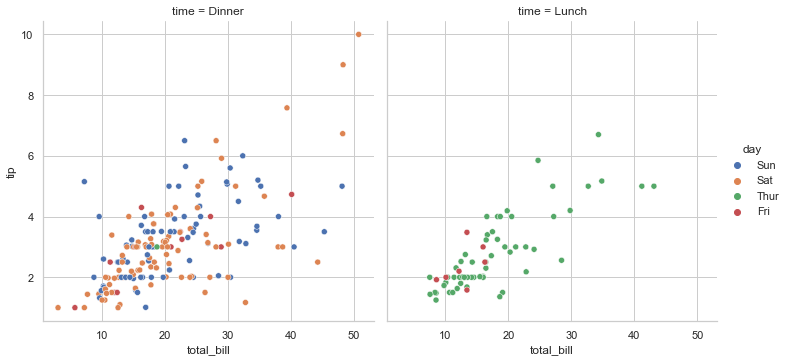

In [37]:
# facet on the columns with another variable
sns.relplot(x='total_bill', y='tip', hue='day', col='time', data = tips)

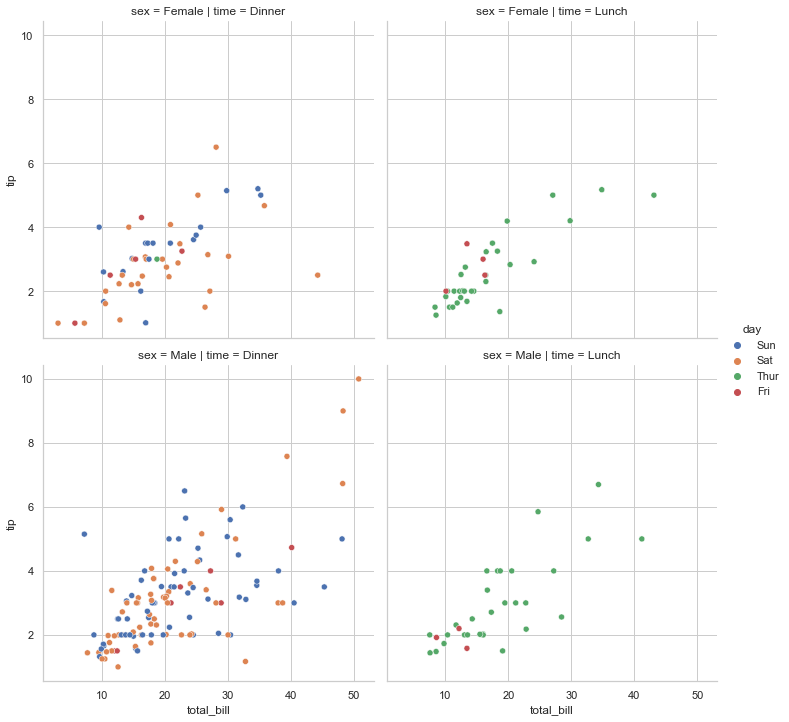

In [38]:
# facet on the columns and rows
sns.relplot(x='total_bill', y='tip', hue='day', col='time', row='sex', data = tips)

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

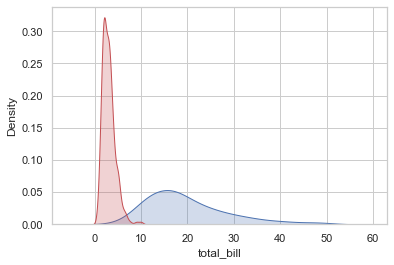

In [77]:
# 2 density function on same graph
# shade under the density curve, use a different color
sns.kdeplot(tips.total_bill,shade=True, color='b')
sns.kdeplot(tips.tip, shade=True, color='r')

<AxesSubplot:ylabel='Density'>

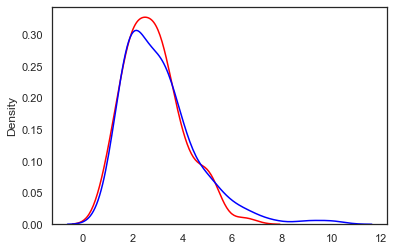

In [46]:
# don't shade under the density curve, use a different color
female_tip=tips[tips['sex'] == 'Female'].tip.values
male_tip=tips[tips['sex'] == 'Male'].tip.values

sns.kdeplot(female_tip, color='red')
sns.kdeplot(male_tip, color='blue')

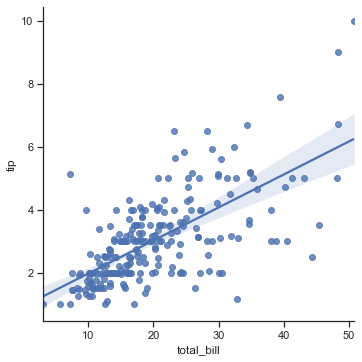

In [47]:
sns.set(style='ticks')

# simple linear relationship between two variables
sns.lmplot(x='total_bill', y='tip', data=tips)

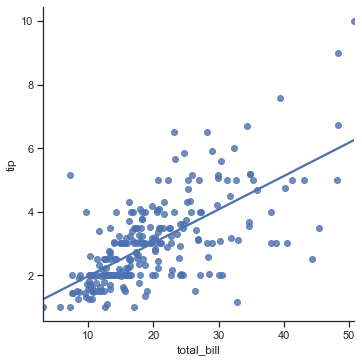

In [48]:
# regression line without confidence interval
sns.lmplot(x='total_bill', y='tip', data=tips, ci=None)

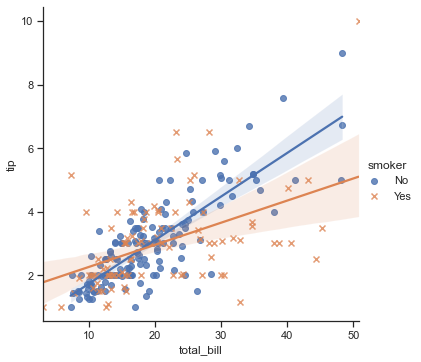

In [49]:
# third variable, levels in different colors with markers
sns.lmplot(x='total_bill', y='tip', data=tips, hue='smoker', markers=['o','x'])

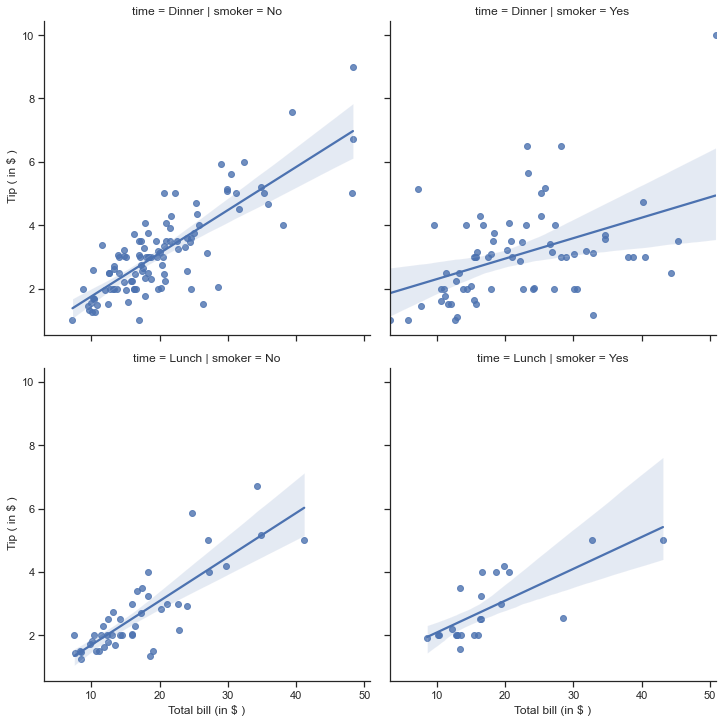

In [50]:
# facet on the columns and rows, set name of axes
sns.lmplot(x='total_bill', y='tip', data=tips, col='smoker',row='time').set_axis_labels('Total bill (in $ )', ' Tip ( in $ )')

<AxesSubplot:>

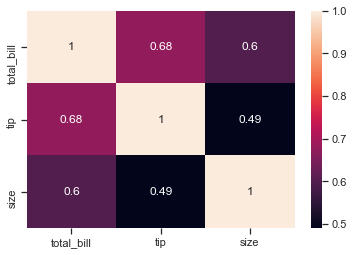

In [51]:
# visualize the correlation matrix
sns.heatmap(data=tips.corr(),annot=True) # values of Pearson coefficient

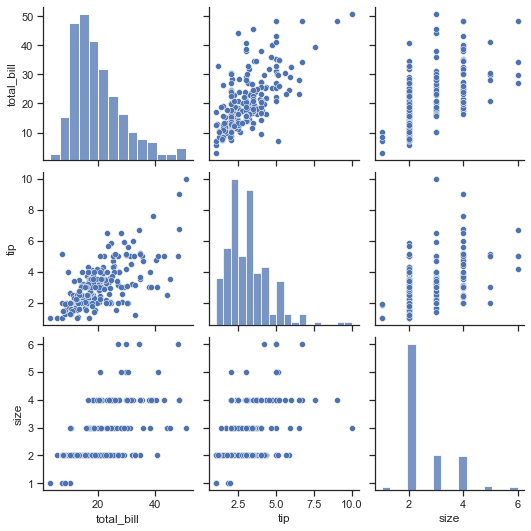

In [52]:
# simple paiplot - all numerical varibles, scatter plots and histograms on diagonal
sns.pairplot(tips)

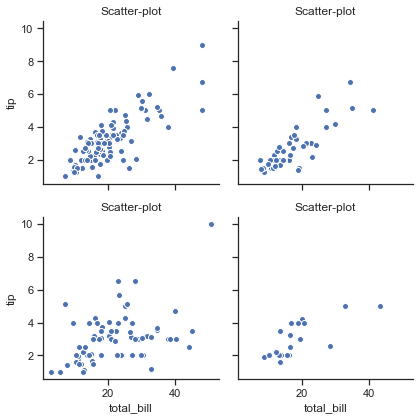

In [56]:
# facets on column and row
g = sns.FacetGrid(tips, col='time',  row='smoker')
g = g.map(plt.scatter, 'total_bill', 'tip', edgecolor='w').set_titles('Scatter-plot')

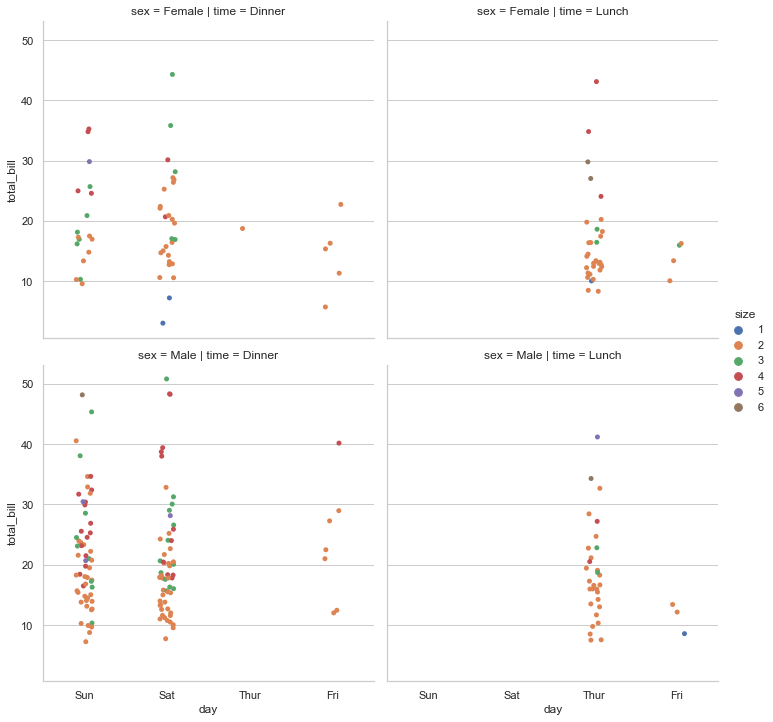

In [69]:
# facet on column, grouped by 2 variables
sns.catplot(x='day', y='total_bill', data=tips, hue='size', col='time', row='sex' )

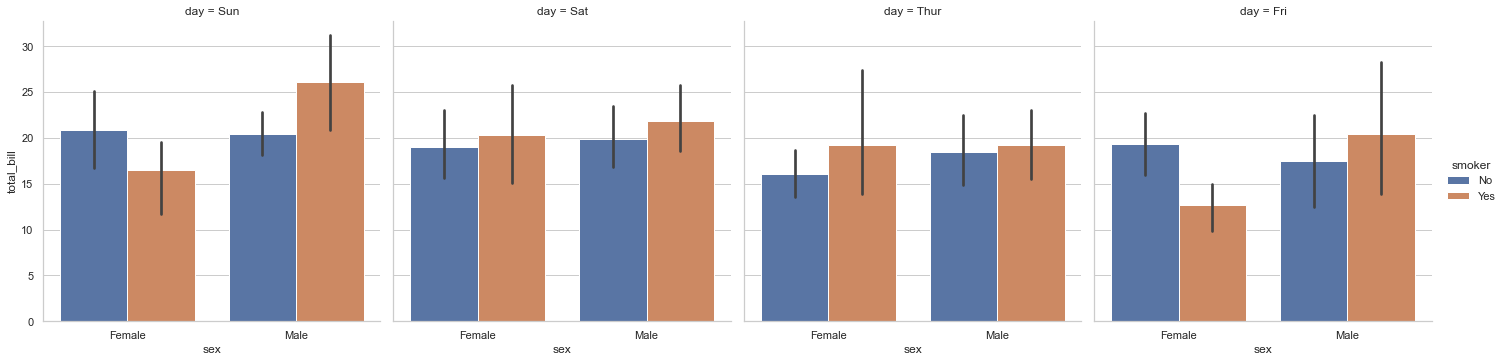

In [72]:
# use a different plot kind to visualize the same data
sns.catplot(x='sex', y='total_bill', data=tips, hue='smoker', col='day', kind='bar')